In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')                 # basically it will make graph more visualize and grid at background
%matplotlib inline

import plotly
import plotly.express as px          #wrapper of plotly
import plotly.graph_objects as go    # to use plotly in Object Oriented way
from plotly.subplots import make_subplots # to make subplots
plt.rcParams['figure.figsize'] = 17,8  # for graph makes bigger

import cufflinks as cf               # to binds pandas with plotly for easyness
import plotly.offline as pyo         # for using plotly offline
from plotly.offline import init_notebook_mode,plot,iplot

import folium                        # for map purpose

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()                          # to use plotly offline 

## Reading Excel file 

In [3]:
df =pd.read_excel(r"Covid_cases_in_India.xlsx")

In [4]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


### to drop S. No

In [5]:
df.drop(['S. No.'], axis=1, inplace=True)

In [6]:
df.head(2)

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0


### create another column for total no. of cases

In [7]:
df['Total No. of cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [8]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total No. of cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [9]:
total_cases = df['Total No. of cases'].sum()
print('Total number of cases in India in March 2020 is', total_cases)

Total number of cases in India in March 2020 is 729


### to create new column for active cases

In [10]:
df['active cases'] = df['Total No. of cases'] - df['Cured'] + df['Death']

In [11]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total No. of cases,active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,34
3,Gujarat,43,0,0,3,43,46
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,5
6,Karnataka,20,0,3,2,20,19
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,24
9,Maharashtra,144,3,15,4,147,136


### for better presentation of data in front of your client or for better understanding

In [12]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total No. of cases,active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,34
3,Gujarat,43,0,0,3,43,46
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,5
6,Karnataka,20,0,3,2,20,19
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,24
9,Maharashtra,144,3,15,4,147,136


### using groupby for comparing state with active cases 

In [13]:
Total_active_cases = df.groupby('Name of State / UT')['active cases'].sum().sort_values(ascending=False).to_frame()

In [14]:
Total_active_cases

,active cases
Name of State / UT,
Maharashtra,136
Kerala,127
Gujarat,46
Telengana,44
Rajasthan,40
Tamil Nadu,35
Delhi,34
Uttar Pradesh,32
Punjab,30


In [15]:
Total_active_cases.style.background_gradient(cmap='Reds')

,active cases
Name of State / UT,
Maharashtra,136
Kerala,127
Gujarat,46
Telengana,44
Rajasthan,40
Tamil Nadu,35
Delhi,34
Uttar Pradesh,32
Punjab,30


In [16]:
df.rename(columns = {'Name of State / UT': 'State/UT Name'}, inplace=True)

## Graphical Representation

## 1) Bar

### using pandas itslef  and plotly

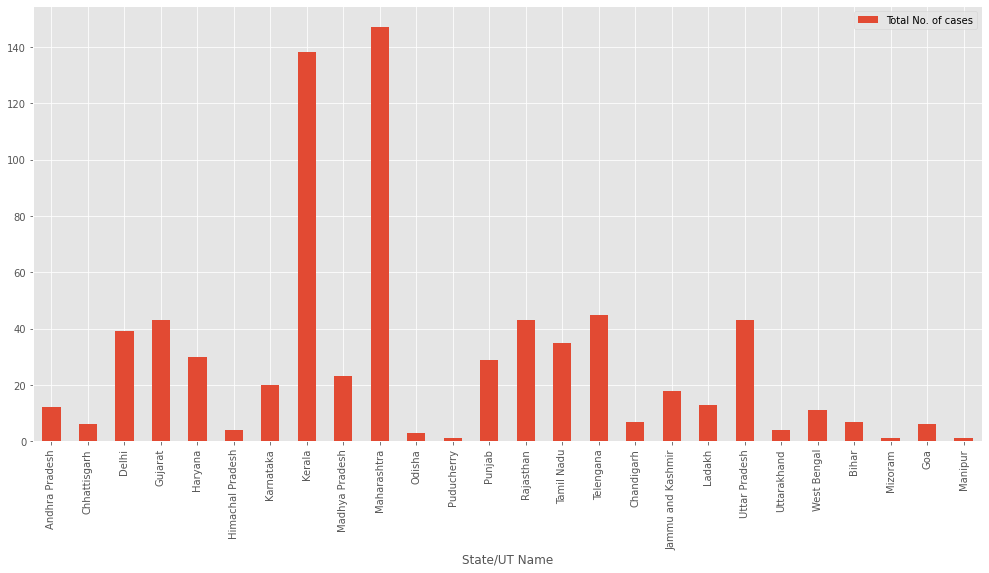

In [17]:
# pandas
df.plot(kind='bar', x='State/UT Name', y='Total No. of cases')            
plt.show()

# plotly
df.iplot(kind='bar', x='State/UT Name', y='Total No. of cases')  

### using matplotlib  -- functional method 

<BarContainer object of 26 artists>

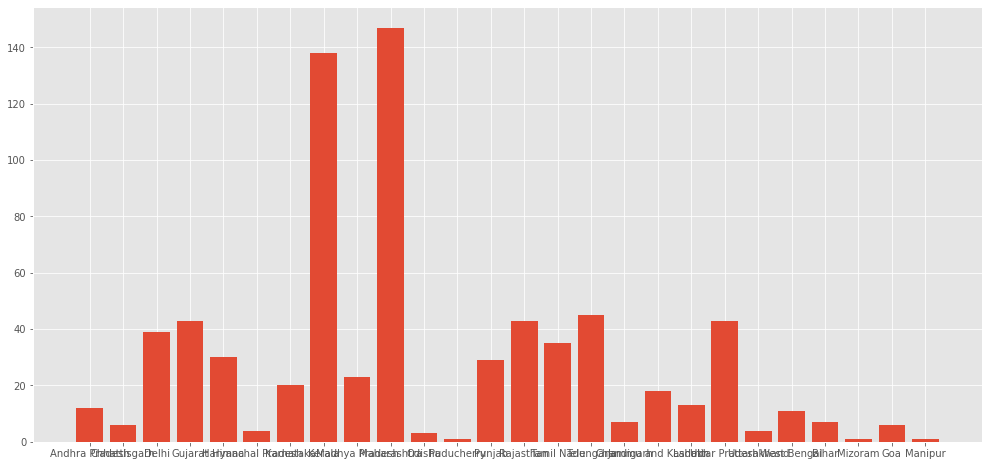

In [18]:
plt.bar(df['State/UT Name'], df['Total No. of cases'])

### using plotly express

In [19]:
px.bar(df,x='State/UT Name',y='Total No. of cases')

## 2) Scatter

### using pandas

<AxesSubplot:xlabel='State/UT Name', ylabel='Total No. of cases'>

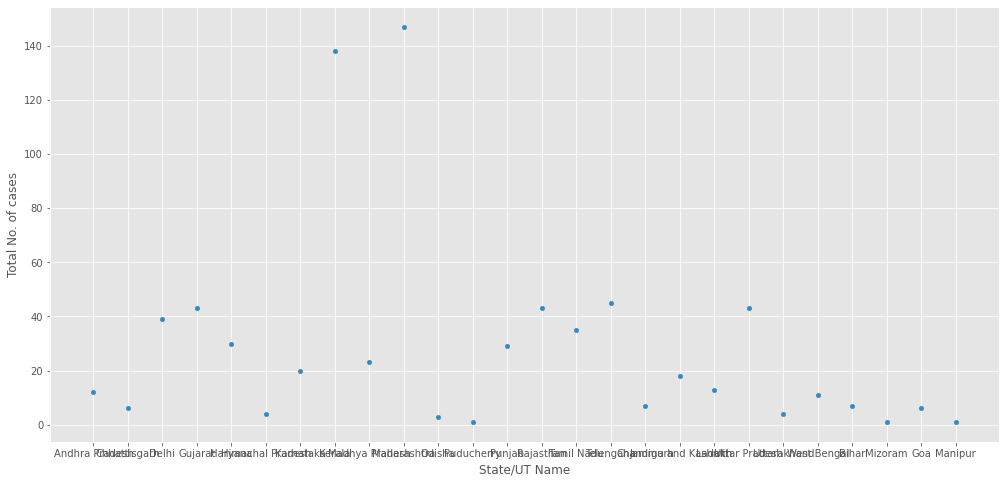

In [20]:
df.plot(kind='scatter', x='State/UT Name', y='Total No. of cases')

### using matplotlib

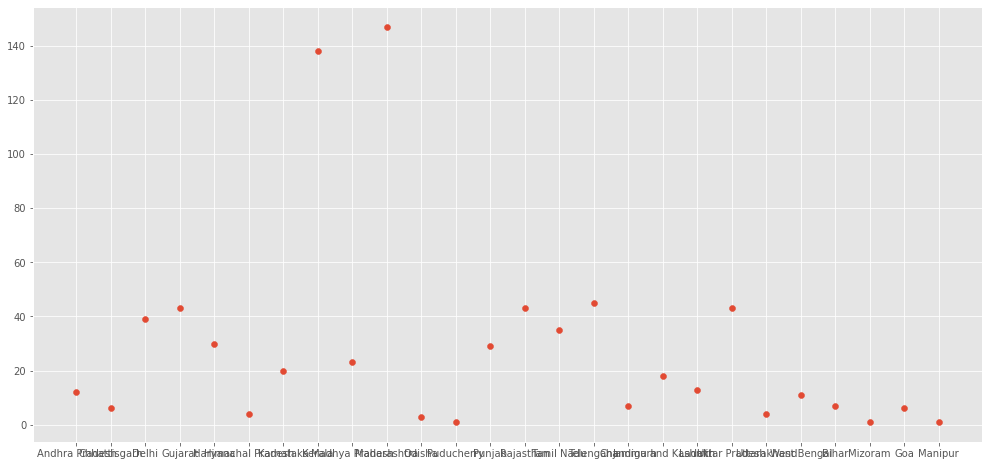

In [21]:
plt.scatter(df['State/UT Name'], df['Total No. of cases'])

### using plotly

In [22]:
df.iplot(x='State/UT Name', y='Total No. of cases', mode='markers+lines',
        title='Covid-19 In India(March 2020)', xTitle='State/UT Name', yTitle='Total No. of cases', color='Red', size=16)

### using plotly as express

In [23]:
px.scatter(df,x='State/UT Name', y='Total No. of cases')

# Object Oriented way
## Using Matplotlib

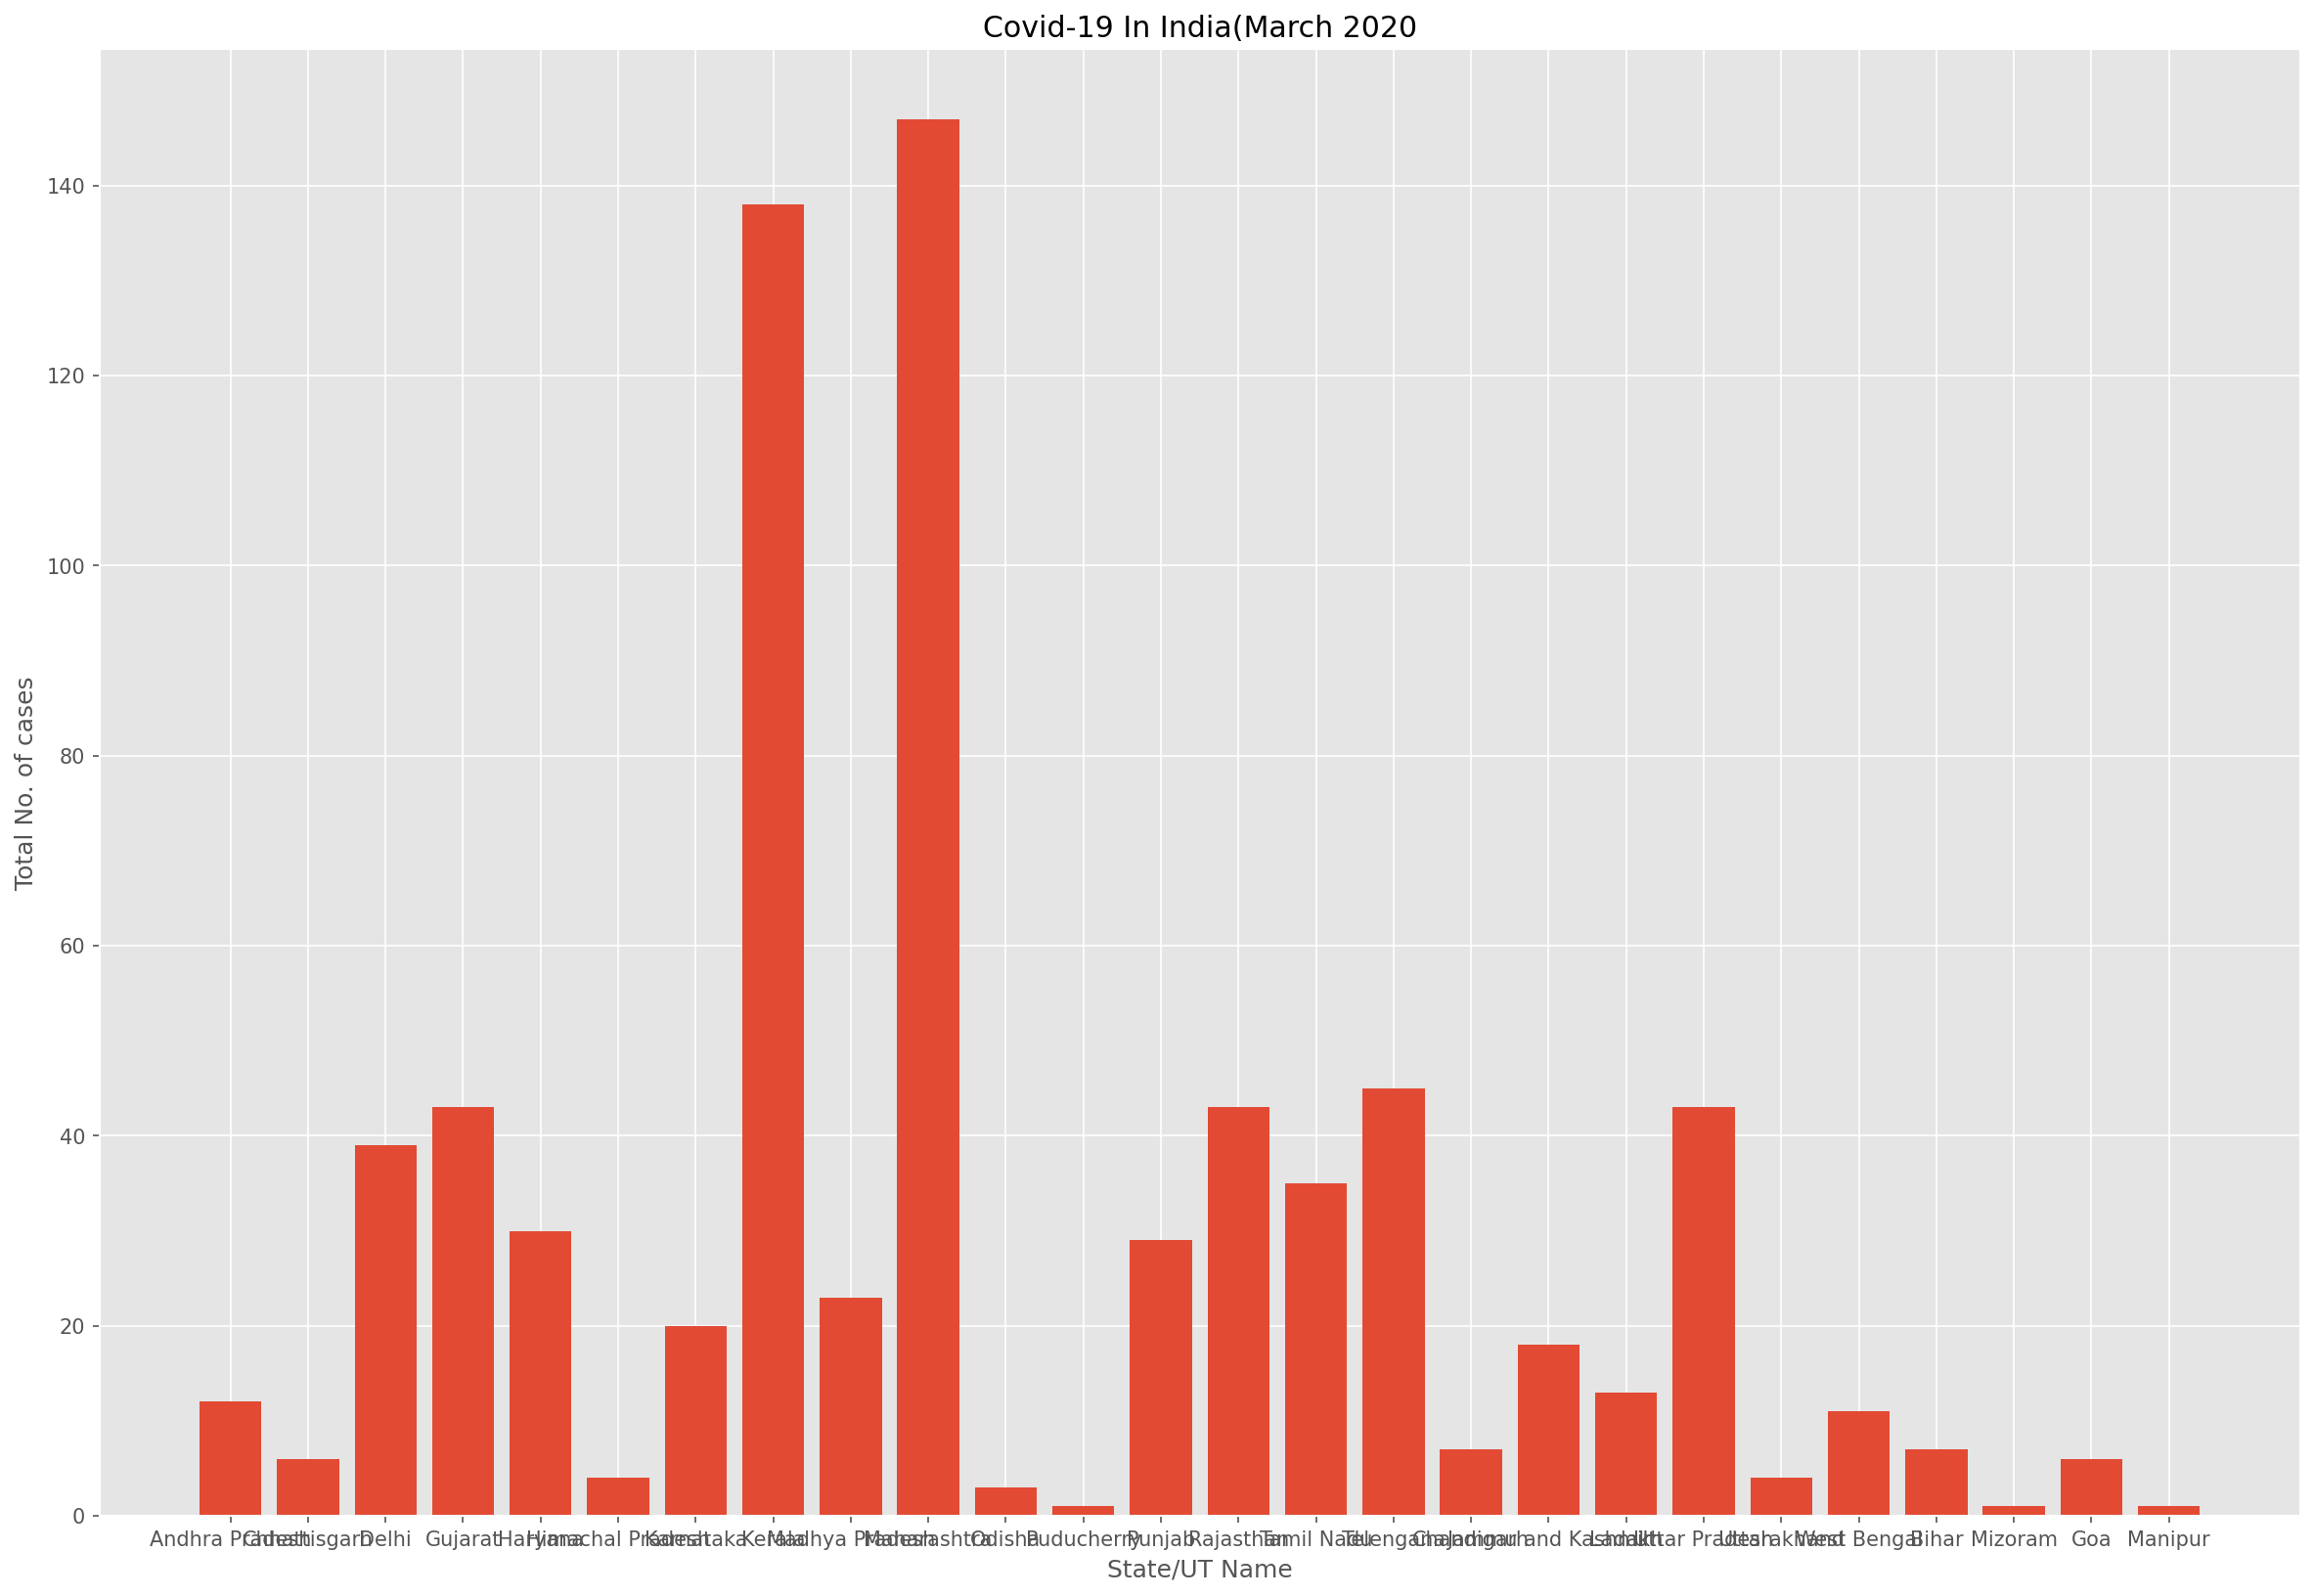

In [24]:
fig = plt.figure(figsize=(15,10), dpi=150)
axes = fig.add_axes([0,0,1,1])
axes.bar(df['State/UT Name'], df['Total No. of cases'])
axes.set_title('Covid-19 In India(March 2020')
axes.set_xlabel('State/UT Name')
axes.set_ylabel('Total No. of cases')
plt.show()

### Using plotly

In [25]:
fig = go.Figure()
fig.add_traces(go.Bar(x=df['State/UT Name'], y=df['Total No. of cases']))
fig.update_layout(title='Total cases in india', xaxis=dict(title='State/UT Name'), yaxis=dict(title='Total No. of cases'))

In [26]:
df.rename(columns = {'State/UT Name': 'Name of State / UT'}, inplace=True)

# Map

In [27]:
Indian_Cord = pd.read_excel('Indian Coordinates.xlsx')
Indian_Cord

,Name of State / UT,Latitude,Longitude,Unnamed: 3
0,Andaman And Nicobar,11.667026,92.735983,NaN
1,Andhra Pradesh,14.750429,78.570026,NaN
2,Arunachal Pradesh,27.100399,93.616601,NaN
3,Assam,26.749981,94.216667,NaN
4,Bihar,25.785414,87.479973,NaN
5,Chandigarh,30.719997,76.780006,NaN
6,Chhattisgarh,22.090420,82.159987,NaN
7,Dadra And Nagar Haveli,20.266578,73.016618,NaN
8,Delhi,28.669993,77.230004,NaN
9,Goa,15.491997,73.818001,NaN


### merging Indian cordinates with respective state and uts


In [28]:
df_full = pd.merge(Indian_Cord,df,on='Name of State / UT')
df_full

,Name of State / UT,Latitude,Longitude,Unnamed: 3,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total No. of cases,active cases
0,Andhra Pradesh,14.750429,78.570026,NaN,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,NaN,38,1,6,1,39,34
2,Haryana,28.450006,77.019991,NaN,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,NaN,20,0,3,2,20,19
4,Kerala,8.900373,76.569993,NaN,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,NaN,144,3,15,4,147,136
6,Punjab,31.519974,75.980003,NaN,29,0,0,1,29,30
7,Rajasthan,26.449999,74.639981,NaN,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,NaN,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,NaN,32,3,1,1,35,35


In [29]:
map = folium.Map(location=[20,70], zoom_start=4,tiles='stamenterrain')

#for lat, lonf, value, name in zip(df_full['latitude'],df_full['longitude'],df_full['Total No. of cases'],
#                                df_full['Name of State / UT']):
#    folium.CircleMarker([lat,long], radius=value*0.8, popup=('<strong>state</strong>: ' + str(name).capitalize()+'
#                                                             <br>''<strong>Total cases</strong>:'+ str(value) + '<br>'),
#                                                            fill_color='red',fill_opacity=0.3)



for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total No. of cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.6,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total No. of cases</strong>: ' +
                                                           str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)

In [30]:
map

# How Covid-19 raising globally

In [31]:
Cov_India = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='India')
Cov_Italy = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
Cov_Korea = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')
Cov_Wuhan = pd.read_excel('per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')

Cov_India

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


## Visualization

### using matplotlib 

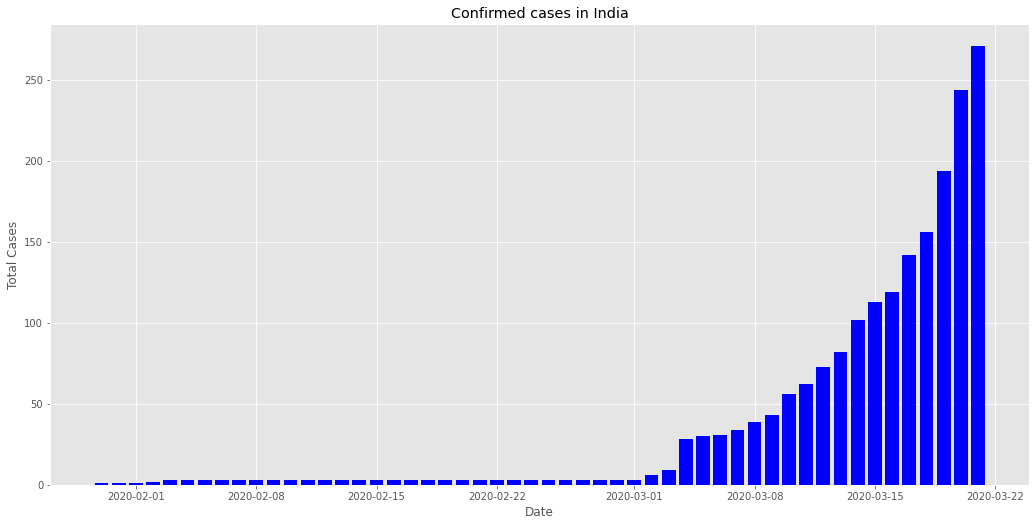

In [32]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(Cov_India['Date'], Cov_India['Total Cases'], color='blue')
axes.set_title('Confirmed cases in India')
axes.set_xlabel('Date')
axes.set_ylabel('Total Cases')
plt.show()

## using plotly as express

In [33]:
fig = px.bar(Cov_India,x=Cov_India['Date'], y=Cov_India['Total Cases'],color='Total Cases', title='Confirmed Cases in India')
fig.show()

In [34]:
fig_Italy = px.bar(Cov_Italy,x=Cov_Italy['Date'],y=Cov_Italy['Total Cases'], color='Total Cases', 
                   title='Confirmed Cases in Italy')
fig_Italy.show()

fig_Korea = px.bar(Cov_Korea,x=Cov_Korea['Date'],y=Cov_Korea['Total Cases'], color='Total Cases', 
                   title='Confirmed Cases in Korea')
fig_Korea.show()

fig_Wuhan = px.bar(Cov_Wuhan,x=Cov_Wuhan['Date'],y=Cov_Wuhan['Total Cases'], color='Total Cases',
                   title='Confirmed Cases in Wuhan')
fig_Wuhan.show()

### using plotly

In [35]:
Cov_India.iplot(kind='scatter', x='Date', y='Total Cases', mode='lines+markers')

### using plotly object oriented

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Cov_India['Date'],y=Cov_India['Total Cases'], mode="lines+markers"))

## Subplots using Bar Graph - plotly oo

In [37]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{'secondary_y':True},{'secondary_y':True}], [{'secondary_y':True},{'secondary_y':True}]],
                    subplot_titles = ('S.Korea','Italy','India','Wuhan'))

fig.add_trace(go.Scatter(x=Cov_Korea['Date'],y=Cov_Korea['Total Cases'],
                    marker=dict(color=Cov_Korea['Total Cases'], coloraxis='coloraxis')),1,1)

fig.add_trace(go.Scatter(x=Cov_Italy['Date'],y=Cov_Italy['Total Cases'],
                    marker=dict(color=Cov_Italy['Total Cases'], coloraxis='coloraxis')),2,1)

fig.add_trace(go.Scatter(x=Cov_India['Date'],y=Cov_India['Total Cases'],
                    marker=dict(color=Cov_India['Total Cases'], coloraxis='coloraxis')),1,2)

fig.add_trace(go.Scatter(x=Cov_Wuhan['Date'],y=Cov_Wuhan['Total Cases'],
                    marker=dict(color=Cov_Wuhan['Total Cases'], coloraxis='coloraxis')),2,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False, title_text='total Cases in 4 countries')

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

### World Coronavirus

In [38]:
WC = pd.read_csv(r'covid_19_data.csv', parse_dates=['Last Update'])

In [39]:
WC.rename(columns = {'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
WC

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [40]:
WC.query('Country=="India"')          # see syntax carefully

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,2020-01-30 16:00:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,2020-01-31 23:59:00,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,2020-01-31 08:15:00,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02 06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
740,741,02/04/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
810,811,02/05/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
881,882,02/06/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
954,955,02/07/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
1026,1027,02/08/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0


### total confirmed , death and recovered cases on particular date

In [61]:
confirmed = WC.groupby('Date').sum()['Confirmed'].reset_index()
death = WC.groupby('Date').sum()['Deaths'].reset_index()
recovered= WC.groupby('Date').sum()['Recovered'].reset_index()

In [63]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'],mode='lines+markers', 
                         name='Confirmed', line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=death['Date'], y=death['Deaths'],mode='lines+markers', 
                         name='Deaths', line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'],mode='lines+markers', 
                         name='Recovered', line=dict(color='green', width=2)))

In [82]:
df_confirmed = pd.read_csv('time_series_covid_19_confirmed.csv')

In [83]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)

In [85]:
df_latlong=pd.merge(df,df_confirmed,on=['Country','Province/State'])

KeyError: 'Country'

In [87]:
fig=px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",hover_data=["Confirmed","Deaths","Recovered"],
                      animation_frame="Date",color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

NameError: name 'df_latlong' is not defined